In [14]:
import pandas as pd
import numpy as np

In [15]:
df = pd.read_json('ECAPA_emb.json')
df.head()

,emb,label
0,"[26.3385562897, 8.0963411331, 35.8839073181, -...",non
1,"[35.1725196838, -5.8392777443, 22.8046245575, ...",non
2,"[-1.9190120697, 14.146528244, 36.8569335938, 2...",non
3,"[4.5055031776, 17.4238910675, 8.7175970078, 26...",non
4,"[1.2245376110000001, 6.7066383362, 36.62985610...",non


In [20]:
feat = df['emb']
label = df['label']
feat = np.stack(feat)

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(feat)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]
df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.0394117  0.02144216 0.01996869]


/tmp/ipykernel_4285/3663404503.py:5: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.scatterplot(


<Axes: xlabel='pca-one', ylabel='pca-two'>

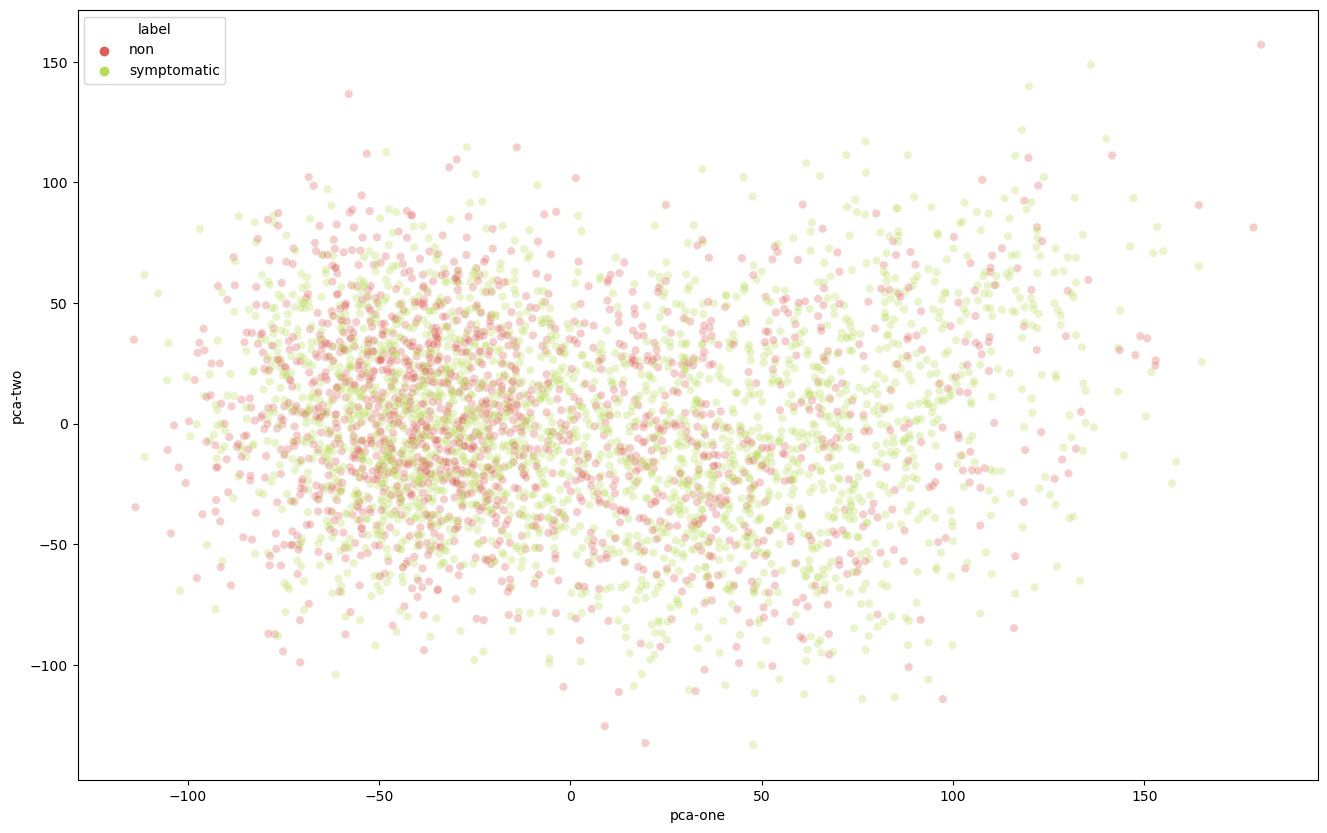

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", 5),
    data=df,
    legend="full",
    alpha=0.3
)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4001 samples in 0.001s...
[t-SNE] Computed neighbors for 4001 samples in 0.292s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4001
[t-SNE] Computed conditional probabilities for sample 2000 / 4001
[t-SNE] Computed conditional probabilities for sample 3000 / 4001
[t-SNE] Computed conditional probabilities for sample 4000 / 4001
[t-SNE] Computed conditional probabilities for sample 4001 / 4001
[t-SNE] Mean sigma: 95.050866
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.652481
[t-SNE] KL divergence after 300 iterations: 3.342299


/tmp/ipykernel_4285/1693633445.py:10: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.scatterplot(


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

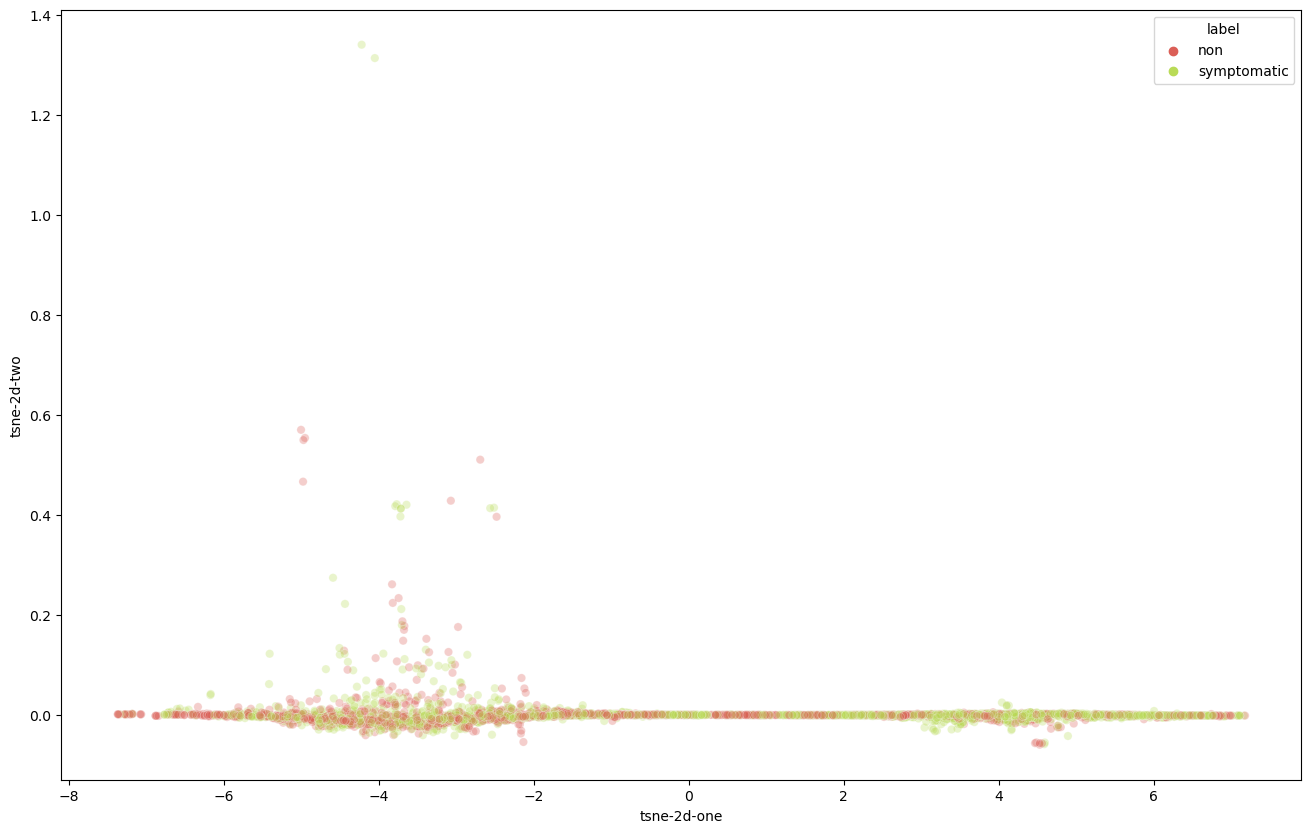

In [33]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(feat)

df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 5),
    data=df,
    legend="full",
    alpha=0.3
)